In [16]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

np.random.seed(42)

### Optimization

Benchmark calculation speed for Cayley transform

Cayley transform <br>
$\phi_{\nu}(X) = (I - \nu X)^{-1} \cdot (I + \nu X) \hspace{12pt} | \hspace{6pt} X^T = -X$

In [13]:
def phi(x, nu):
    return np.linalg.inv(np.eye(size) - nu * x) @ (np.eye(size) + nu * x)

Measure for orthogonality <br>
$\kappa(x) = || I - x \cdot x^T||$

In [14]:
def kappa(x):
    return np.linalg.norm(np.eye(x.shape[0]) - x@x.T)

In [17]:
# Initialize matrices
size = 2**2
nu = 10e-4

# test function
A = np.random.random((size, size))
X = A.T - A
Y = phi(X, nu)

In [28]:
# Depth of testing
depth = 8
# Sizes to test
sizes = [2**i for i in range(depth)]
# time calculation
times = 1000
timings = [[None] * times for i in range(depth)]

for i, size in enumerate(sizes):
    A = np.random.random((size, size))
    X = A.T - A
    for j in range(times):
        start = timer()
        Y = phi(X, nu)
        end = timer()
        timings[i][j] = end - start

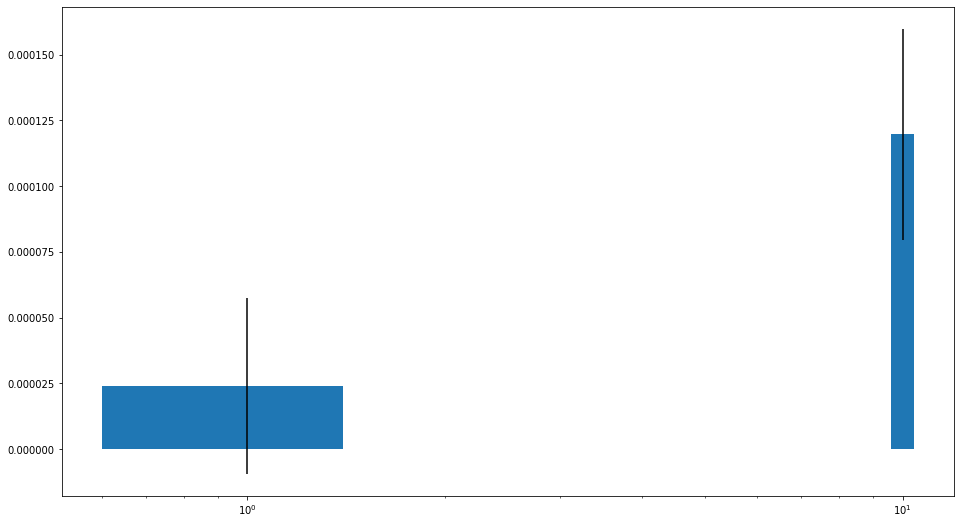

In [29]:
plt.figure(figsize=(16, 9))
plt.bar(x=range(depth), height=[np.mean(t) for t in timings], yerr=[np.std(t) for t in timings])
plt.show()